## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [182]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [183]:
#Importing image from the github.
import requests
from io import BytesIO
from PIL import Image
url = 'https://raw.githubusercontent.com/Suraj2001/CECS550-Pattern_Recognition/main/HW1/lemon.jpeg'
page = requests.get(url)
image = np.array(Image.open(BytesIO(page.content)))

#Try below code if the image is not getting imported.
#image = np.array(Image.open('./lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





In [184]:
print("Shape of the original image: ", image.shape)

Shape of the original image:  (100, 100, 3)


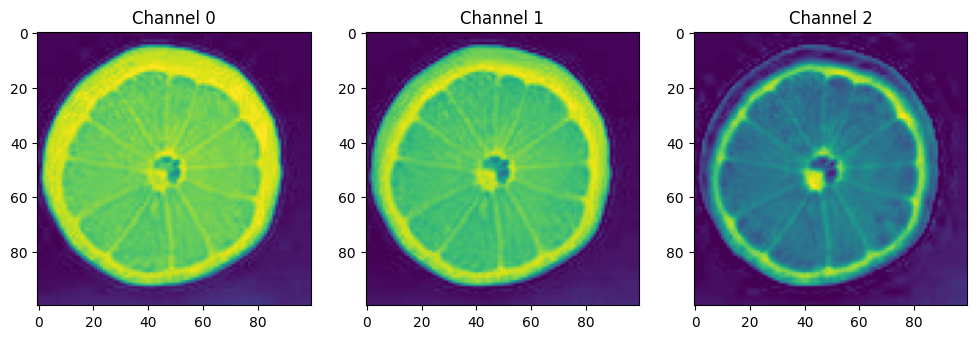

In [185]:
# Make a wider figure so we can fit in subplots
plt.figure(figsize=(12, 4))

# Show each of the three channels
for i in range(3):

    # Subplot indices start at 1
    plt.subplot(1, 3, i+1)

    # Array indices start at 0
    im_channel = image[:, :, i]
    plt.imshow(im_channel)
    plt.title(f'Channel {i}')

plt.show()

In [186]:
#Create a new variable img_single_channel that is equivalent to the last color channel of image
img_single_channel = image[:, :, -1]
#Generate matrix equivalent to the matrix created by last channel of the original image
print("Last Channel Matrix: \n", img_single_channel)
print("\nShape of img_single_channel: ", img_single_channel.shape)

Last Channel Matrix: 
 [[ 3  3  3 ...  3  3  3]
 [ 3  3  3 ...  3  3  3]
 [ 3  3  3 ...  3  3  3]
 ...
 [10 10 11 ... 27 27 26]
 [12 12 13 ... 29 30 28]
 [13 14 14 ... 32 33 32]]

Shape of img_single_channel:  (100, 100)


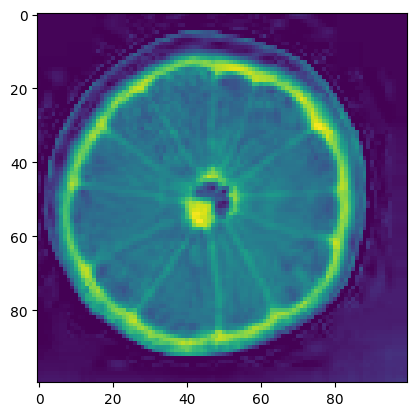

In [187]:
#Plot matrix into image using matplotlib
plt.imshow(img_single_channel)

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

In [188]:
#Using axis=-1 to average the channel along the last dimension
img_average_channel = image.mean(axis=-1)

print("Shape of average of all the three channels: ",img_average_channel.shape)

Shape of average of all the three channels:  (100, 100)


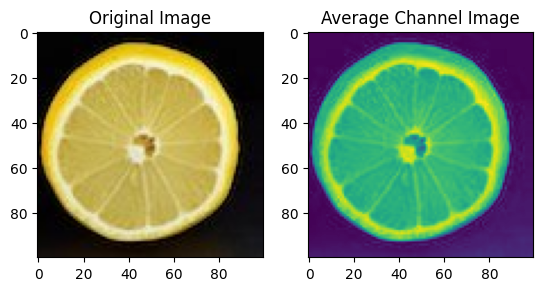

In [189]:
#Plotting the original image
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")

#Plotting average channel image
plt.subplot(1,2,2)
plt.imshow(img_average_channel)
plt.title("Average Channel Image")

plt.show()

##**Comments on difference between Part 1 and Part 2**

**Here, we are basically ‘averaging out’ the last channel, as we've kept axis=-1 for image having shape (100,100,3), we get back an array of shape (100, 100) where the (i, j, 0) element is the average of the sub-array X[i, j, :]. We’re averaging out the last dimension.**

**While in Part 1, we are seperating out all the three channels and retrieving the single channel, i.e, the last dimension.**

**Thus, Part 1 displayed a single color channel, while Part 2 displayed the average of all color channels.**

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

###**Identity Matrix**

The identity matrix I is a square matrix containing all zeroes, except for 1's on the top-left to bottom-right diagonal. Multiplying a matrix by the identity matrix is much like multiplying a number by the number 1, in that nothing changes as a result of the multiplication.

In [190]:
#Generate Identity matrix and compare its size with img_average_channel
print("The size of img_average channel: ",img_average_channel.size)
identity_matrix = np.identity(len(img_average_channel))
print("\n Identity Matrix:\n",identity_matrix)
print("\n Size of the Identity Matrix: ",identity_matrix.size)

The size of img_average channel:  10000

 Identity Matrix:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

 Size of the Identity Matrix:  10000


In [191]:
#Print random row from the identity matrix
print("Random row from the identity matrix: \n", identity_matrix[np.random.randint(0, identity_matrix.shape[0])])

Random row from the identity matrix: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**After creating identity_matrix, we print one random row from it to observe its contents and with ones on the main diagonal and zeros elsewhere, and selecting i th row will give only single "1" at i th column position and zeros everywhere else.**

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [192]:
#Numpy array that contains the numbers  0,1,⋯,N  where  N  is the number of rows in the image
rows = np.arange(img_average_channel.shape[0])
#Shuffling the elements of rows array.
np.random.shuffle(rows)
print("Shuffled rows:\n", rows)

Shuffled rows:
 [85 88 84 20 13 52 83 14 80 96 16 34 99 70 89 43 62  1 39 67 23 58 27 59
 40 60 79  4  3 45 86 78 21 42  2  0 30 73 22 41 50 68 31 25 93 97 26  6
 44 91  7 47 17  5 28 65 55 11 81 71 36  9 95 61 77 15 74 19 29 94 24 54
 92 57 66 48 69 64 98 76 75 35 38 56 10 18 87 33 32 63 72 51 49 53 46 82
 90 12 37  8]


**Whenever the function is called, each time the rows will shuffled randomly.**

## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [193]:
#Creating a new matrix T from identity_matrix with same elements as identity_matrix, but the order of the rows is according to the variable rows.
T = identity_matrix[rows]
print("Identity matrix shape", identity_matrix.shape)
print("Average channel shape", img_average_channel.shape)

#Check to see if is the same size as identity_matrix and img_average_channel and reshape it if necessary.
if T.shape == identity_matrix.shape and T.shape == img_average_channel.shape:
  print("T shape:", T.shape)
else:
  np.reshape(T, img_average_channel.shape)
  print("T has been reshaped to: ", T.shape)

Identity matrix shape (100, 100)
Average channel shape (100, 100)
T shape: (100, 100)


**T is a permutation matrix whose rows are shuffled according to permutation. In simple words, we can notice that the rows of the identity matrix gets shuffled based on the shuffled indices of the rows array which forms the T matrix.**

**For example, the 1's will located in the column corresponding to the value of indices in rows array.**

In [194]:
print("New matrix T:\n", T)

New matrix T:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

Transformed image shape: (100, 100)


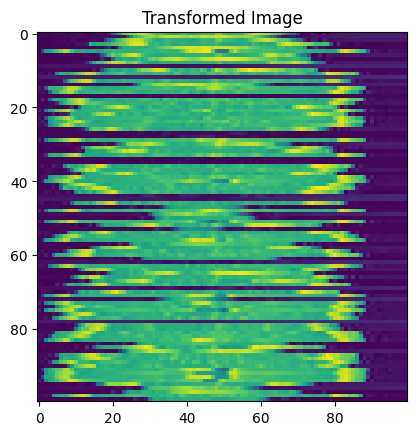

In [195]:
#Matrix multiplication of T and img_avg_channel
transformed_image = T@img_average_channel
print("Transformed image shape:", transformed_image.shape)

#Plotting the transformed image.
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.show()

##**Comments**

**The pattern in the transformed image depends on the shuffling of rows which is random. Dot product in the matrix multiplication calculates a weighted sum of values from the original img_average_channel. The transformation is essentially rearranging the rows of img_average_channel based on the permutation specified by T.**

**In our example, it's the rows of the original image have been shuffled or permuted according to the shuffling pattern present in T. This transformation leads to a different visual arrangement of the pixel values while plotting the image.**

**In a real-world application, this kind of transformation can have various uses, such as data encryption where we can hide the original data in a way that makes it difficult to interpret without knowing the permutation.**

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

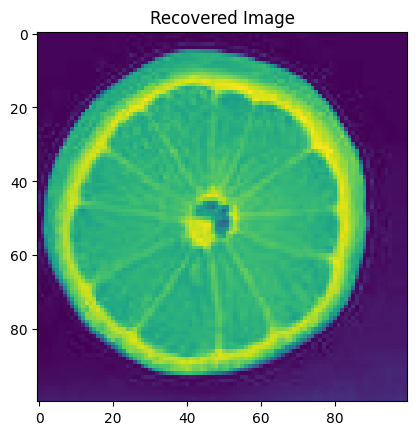

In [196]:
#Matrix T is invertible because it is generated from an identity matrix.
Tinv = inv(T)
recovered_image = Tinv@transformed_image
plt.imshow(recovered_image)
plt.title("Recovered Image")
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


Scrambling Columns:


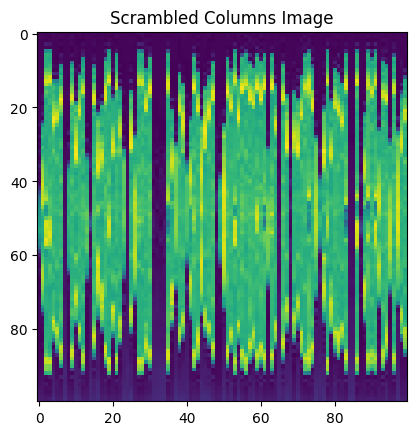

In [197]:
print("Scrambling Columns:")
cols = np.arange(img_average_channel.shape[1])
np.random.shuffle(cols)

#Permutation matrix where columns will be shuffled instead of rows.
T_cols = np.eye(img_average_channel.shape[1])[cols]
scrambled_image_cols = img_average_channel@T_cols

#Plotting the image based on scrambled columns
plt.imshow(scrambled_image_cols)
plt.title("Scrambled Columns Image")
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

Scrambling Rows and Columns


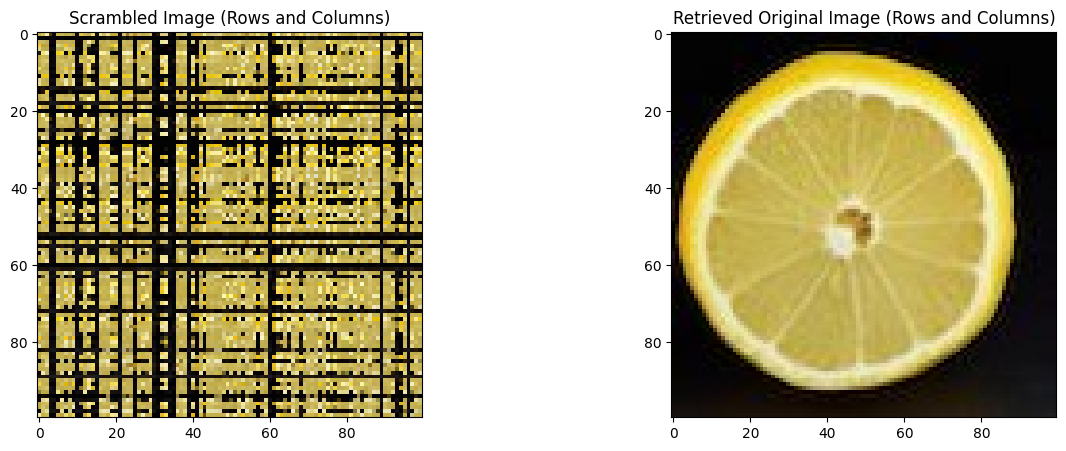

In [198]:
print("Scrambling Rows and Columns")
# Create shuffled rows and columns indices
rows = np.arange(image.shape[0])
cols = np.arange(image.shape[1])
np.random.shuffle(rows)
np.random.shuffle(cols)

# Create matrices T_row and T_col from identity matrices with shuffled rows and columns
T_row = identity_matrix[rows]
T_col = identity_matrix[:, cols]


# Matrix multiply T_row, image, and T_col to get scrambled_image
scrambled_image = np.zeros_like(image)
for channel in range(3):
  scrambled_image[:, :, channel] = np.dot(T_row, np.dot(image[...,channel], T_col))

# Plot the scrambled image
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(scrambled_image.astype(np.uint8))
plt.title("Scrambled Image (Rows and Columns)")

# Inverse the scrambling operation to retrieve the original image
retrieved_image = np.zeros(image.shape, dtype=image.dtype)
for i in range(3):
  retrieved_image[:,:,i] = np.dot(np.linalg.inv(T_row), np.dot(scrambled_image[...,i], np.linalg.inv(T_col)))

# Plot the retrieved original image
plt.subplot(1, 2, 2)
plt.imshow(retrieved_image)
plt.title("Retrieved Original Image (Rows and Columns)")
plt.show()

##References

*   https://bioimagebook.github.io/chapters/1-concepts/4-colors/python.html
*   https://chat.openai.com/
